In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# #load PyAutocorrect Colab Notebook
# %run '/content/gdrive/MyDrive/Colab Notebooks/PyAutocorrection.ipynb'

In [4]:
!pip install ffmpeg-python

In [5]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});

</script>
"""

def Get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])

  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)

  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

In [59]:
#load generator colab notebook
%run '/content/gdrive/MyDrive/Colab Notebooks/LoadGenerator.ipynb'

models/text-bison-001


In [7]:
!pip install SpeechRecognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 38.4 MB/s eta 0:00:00


In [8]:
import speech_recognition as sr

def audio_to_text(audio_data, samp_r):
    recognizer = sr.Recognizer()
    audio_file = sr.AudioData(audio_data.tobytes(), samp_r, audio_data.dtype.itemsize)
    try:
        text = recognizer.recognize_google(audio_file)
        return text
    except sr.UnknownValueError:
        print("Google Speech Recognition could not understand audio")
    except sr.RequestError as e:
        print(f"Could not request results from Google Speech Recognition service; {e}")



In [19]:
#generate audio
audio, SR = Get_audio()

<class 'numpy.ndarray'>
sampling rate= 48000


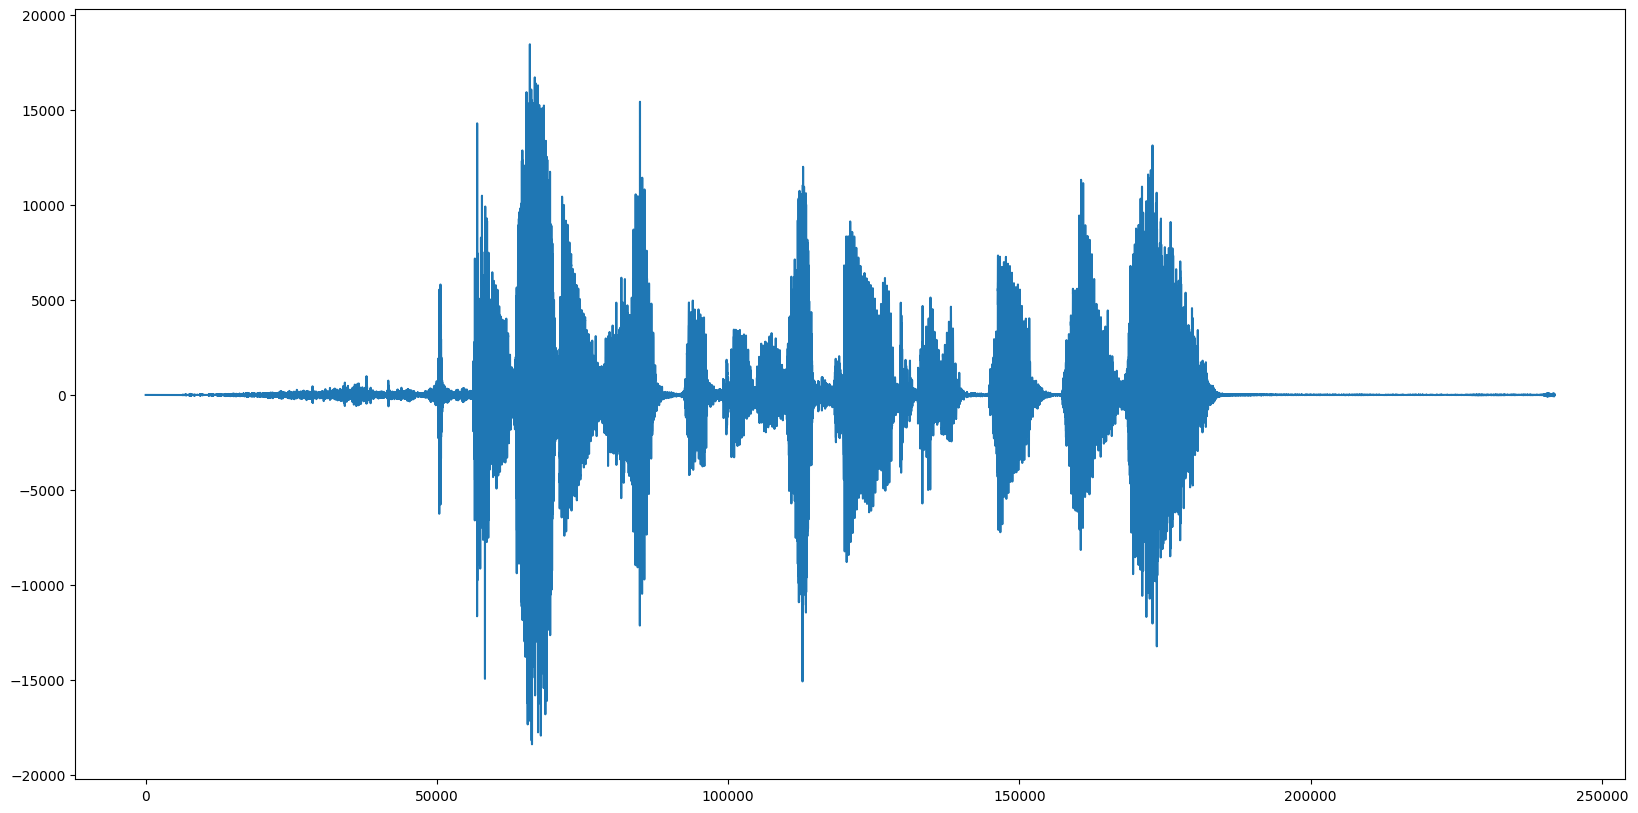

In [20]:
import matplotlib.pyplot as plt
print(type(audio))
print("sampling rate=",SR)
plt.figure(figsize=(20,10))
plt.plot(audio)
plt.show()

In [21]:
text = audio_to_text(audio, SR)
print(text)


I'm so happy that I scored an A+


In [ ]:
# text = autocorrect(text)
# text

In [22]:
pip install transformers

In [23]:
!pip install torch

In [24]:
import torch
from sklearn.model_selection import train_test_split
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
tokenizer = RobertaTokenizer.from_pretrained('roberta-large')
model = RobertaForSequenceClassification.from_pretrained('/content/gdrive/MyDrive/EXAM EMOTIONS MODEL/myModel_better')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

In [52]:
%run '/content/gdrive/MyDrive/Colab Notebooks/Emotion_Recoginition_Roberta.ipynb'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Accuracy: 0.9765625
Confusion Matrix:
[[80  0  0  6  0]
 [ 0 88  0  2  0]
 [ 0  0 88  0  0]
 [ 0  1  0 78  0]
 [ 0  0  0  0 41]]
Classification Report:
              precision    recall  f1-score   support

       anger       1.00      0.93      0.96        86
        fear       0.99      0.98      0.98        90
       happy       1.00      1.00      1.00        88
         sad       0.91      0.99      0.95        79
    surprise       1.00      1.00      1.00        41

    accuracy                           0.98       384
   macro avg       0.98      0.98      0.98       384
weighted avg       0.98      0.98      0.98       384



In [ ]:
import torch
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from transformers import RobertaTokenizer, RobertaForSequenceClassification

# Load the pre-trained model and tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-large')
model = RobertaForSequenceClassification.from_pretrained('/content/gdrive/MyDrive/EXAM EMOTIONS MODEL/myModel_better')

# Set up the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


In [61]:
emotion = predict_emotion(text)
print(emotion)

happy


In [56]:
gen_model = 'models/text-bison-001'

In [60]:
generate_response(text, emotion, gen_model)

"I'm glad to hear that you're happy with your professor. It sounds like they're doing a great job of communicating with students and making sure that the exams are fair."

In [36]:
AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {
    var url = URL.createObjectURL(e.data);

    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});

</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])

  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)

  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr


In [37]:
!pip install boxprint

In [38]:
!pip install termcolor

In [ ]:
import time
import signal
import sys
import speech_recognition as sr

class SpeechRecognitionError(Exception):
    pass

def audio_to_text(audio_data, samp_r):
    recognizer = sr.Recognizer()
    audio_file = sr.AudioData(audio_data.tobytes(), samp_r, audio_data.dtype.itemsize)
    try:
        text = recognizer.recognize_google(audio_file)
        return text
    except sr.UnknownValueError:
        raise SpeechRecognitionError("Google Speech Recognition could not understand audio")
    except sr.RequestError as e:
        raise SpeechRecognitionError(f"Could not request results from Google Speech Recognition service; {e}")

def signal_handler(signal, frame):
    print("\nThank you for using the chatbot. Exiting program...\n")
    sys.exit(0)

signal.signal(signal.SIGINT, signal_handler)

print("Hey user! How may I assist you?")

while True:
    try:
        audio, SR = get_audio()
        time.sleep(2)
        text = audio_to_text(audio, SR)
    except SpeechRecognitionError:
        print("\nSorry, I couldn't understand what you said. Please try again.\n")
        continue

    if text.lower() in ['stop', 'quit', 'exit', 'end', 'bye','goodbye','close']:
        print("\nThank you for using the chatbot. Exiting program...\n")
        break
    else:
        emotion = predict_emotion(text)
        response = generate_response(text, emotion)
        print("\n" + "-"*50)
        print(response.center(50))
        print("-"*50 + "\n")


In [ ]:
import time
import signal
import sys
import speech_recognition as sr

class SpeechRecognitionError(Exception):
    pass

def audio_to_text(audio_data, samp_r):
    recognizer = sr.Recognizer()
    audio_file = sr.AudioData(audio_data.tobytes(), samp_r, audio_data.dtype.itemsize)
    try:
        text = recognizer.recognize_google(audio_file)
        return text
    except sr.UnknownValueError:
        raise SpeechRecognitionError("Google Speech Recognition could not understand audio")
    except sr.RequestError as e:
        raise SpeechRecognitionError(f"Could not request results from Google Speech Recognition service; {e}")

def signal_handler(signal, frame):
    print("\nThank you for using the chatbot. Exiting program...\n")
    sys.exit(0)

signal.signal(signal.SIGINT, signal_handler)

print("Hey user! How may I assist you?")

while True:
    try:
        audio, SR = get_audio()
        time.sleep(2)
        text = audio_to_text(audio, SR)
    except SpeechRecognitionError:
        print("\nSorry, I couldn't understand what you said. Please try again.\n")
        continue

    if text.lower() in ['stop', 'quit', 'exit', 'end', 'bye','goodbye','close']:
        print("\nThank you for using the chatbot. Exiting program...\n")
        break
    else:
        emotion = predict_emotion(text)
        response = generate_response(text, emotion)
        print("\n" + "-"*50)
        print(text)
        print("\n" + "-"*50)
        print("\n" + "-"*50)
        print(response.center(50))
        print("-"*50 + "\n")


In [64]:
import time
import signal
import sys
import speech_recognition as sr

class SpeechRecognitionError(Exception):
    pass

def audio_to_text(audio_data, samp_r):
    recognizer = sr.Recognizer()
    audio_file = sr.AudioData(audio_data.tobytes(), samp_r, audio_data.dtype.itemsize)
    try:
        text = recognizer.recognize_google(audio_file)
        return text
    except sr.UnknownValueError:
        raise SpeechRecognitionError("Google Speech Recognition could not understand audio")
    except sr.RequestError as e:
        raise SpeechRecognitionError(f"Could not request results from Google Speech Recognition service; {e}")

def signal_handler(signal, frame):
    print("\nThank you for using the chatbot. Exiting program...\n")
    sys.exit(0)

signal.signal(signal.SIGINT, signal_handler)

print("Hey user! How may I assist you?")

while True:
    try:
        audio, SR = get_audio()
        time.sleep(2)
        text = audio_to_text(audio, SR)
        print(f"\n{text}\n")
    except SpeechRecognitionError:
        print("\nSorry, I couldn't understand what you said. Please try again.\n")
        continue

    if text.lower() in ['stop', 'quit', 'exit', 'end', 'bye','goodbye','close']:
        print("\nThank you for using the chatbot. Exiting program...\n")
        break
    else:
        emotion = predict_emotion(text)
        response = generate_response(text, emotion, gen_model)
        print("\n" + "-"*50)
        print(response.center(50))
        print("-"*50 + "\n")


Hey user! How may I assist you?



I didn't score well in the exam


--------------------------------------------------
Don't worry, everyone fails sometimes. Just learn from your mistakes and do better next time.
--------------------------------------------------




I prepared most of the things but the paper was from the part that I had left unfortunately


--------------------------------------------------
   Don't worry, you can always retake the test.   
--------------------------------------------------




yes this time I'm definitely going to prepare everything and do well hopefully


--------------------------------------------------
 That's great to hear! I'm sure you'll do great.  
--------------------------------------------------




quit


Thank you for using the chatbot. Exiting program...

